<a href="https://colab.research.google.com/github/shalvin-shabu/NASA-Space-App-Challenge-2025/blob/main/NO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%pip install earthaccess
%pip install cartopy
%pip install netCDF4
%pip install numpy
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 126.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.5.0
    Uninstalling tenacity-8.5.0:
      Successfully uninstalled tenacity-8.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.14.1 requires tenacity<9.0.0,>=8.0.0, but you have tenacity 9.1.2 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which is incom

In [14]:
import earthaccess  # needed to discover and download TEMPO data
import netCDF4 as nc  # needed to read TEMPO data
import numpy as np

import matplotlib.pyplot as plt  # needed to plot the resulting time series
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [15]:
auth = earthaccess.login(persist=True)

Enter your Earthdata Login username: amalkrishnam
Enter your Earthdata password: ··········


In [37]:
short_name = "TEMPO_NO2_L3"  # collection name to search for in the EarthData
version = "V03"

# Point of interest: NASA Langley Research Center, HamptonVA, USA
# latitude 37.1036 deg, longitude -76.3868 deg
# POI_lat = 37.1036
# POI_lon = -76.3868

# generic location, somewhere in the middle of the USA
POI_lat = 40.74
POI_lon = -73.98
date_start = "2025-08-01"
date_end = "2025-10-02"

In [38]:
POI_results = earthaccess.search_data(
    short_name=short_name,
    version=version,
    temporal=(date_start, date_end),
    point=(POI_lon, POI_lat),  # search by point of interest
)

print(len(POI_results))

505


In [39]:
dlat = 5.0  # deg
dlon = 6.0  # deg

bbox_results = earthaccess.search_data(
    short_name=short_name,

    temporal=(date_start, date_end),
    bounding_box=(
        POI_lon - dlon,
        POI_lat - dlat,
        POI_lon + dlon,
        POI_lat + dlat,
    ),  # search by bounding box
)

print(len(bbox_results))

675


In [40]:
POI_results[0]


Collection: {'ShortName': 'TEMPO_NO2_L3', 'Version': 'V03'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 57.66, 'Longitude': -111.02}, {'Latitude': 53.32, 'Longitude': -108.62}, {'Latitude': 49.46, 'Longitude': -106.98}, {'Latitude': 44.56, 'Longitude': -105.36}, {'Latitude': 39.94, 'Longitude': -104.18}, {'Latitude': 34.8, 'Longitude': -103.16}, {'Latitude': 28.6, 'Longitude': -102.24}, {'Latitude': 22.36, 'Longitude': -101.58}, {'Latitude': 17.2, 'Longitude': -101.2}, {'Latitude': 17.14, 'Longitude': -96.68}, {'Latitude': 17.16, 'Longitude': -83.5}, {'Latitude': 17.24, 'Longitude': -74.64}, {'Latitude': 17.42, 'Longitude': -65.10001}, {'Latitude': 21.06, 'Longitude': -64.3}, {'Latitude': 25.24, 'Longitude': -63.16}, {'Latitude': 29.14, 'Longitude': -61.84}, {'Latitude': 32.46, 'Longitude': -60.48}, {'Latitude': 35.92, 'Longitude': -58.78}, {'Latitude': 39.2, 'Longitude': -56.84}, {'Latitude': 42.24, 'Longitude': -54.68}, {'Latitude': 44.82, 'Longitude': -52.5}, {'Latitude': 47.82, 'Longitude': -49.44}, {'Latitude': 50.42, 'Longitude': -46.18}, {'Latitude': 52.68, 'Longitude': -42.7}, {'Latitude': 54.74, 'Longitude': -38.78}, {'Latitude': 56.36, 'Longitude': -34.96001}, {'Latitude': 57.92, 'Longitude': -30.32001}, {'Latitude': 59.08, 'Longitude': -25.84}, {'Latitude': 60.04, 'Longitude': -20.76001}, {'Latitude': 60.12, 'Longitude': -20.72}, {'Latitude': 60.18, 'Longitude': -20.3}, {'Latitude': 60.42, 'Longitude': -20.28}, {'Latitude': 60.44, 'Longitude': -20.10001}, {'Latitude': 61.94, 'Longitude': -20.10001}, {'Latitude': 61.9, 'Longitude': -20.36}, {'Latitude': 62.52, 'Longitude': -20.38}, {'Latitude': 62.46, 'Longitude': -20.88}, {'Latitude': 63.24, 'Longitude': -20.90001}, {'Latitude': 63.12, 'Longitude': -21.86}, {'Latitude': 63.6, 'Longitude': -21.88}, {'Latitude': 63.52, 'Longitude': -22.60001}, {'Latitude': 63.78, 'Longitude': -22.68001}, {'Latitude': 62.28, 'Longitude': -33.10001}, {'Latitude': 60.78, 'Longitude': -44.26}, {'Latitude': 59.76, 'Longitude': -53.28}, {'Latitude': 59.22, 'Longitude': -58.68}, {'Latitude': 58.72, 'Longitude': -64.28}, {'Latitude': 58.22, 'Longitude': -71.6}, {'Latitude': 57.9, 'Longitude': -77.96}, {'Latitude': 57.72, 'Longitude': -83.44}, {'Latitude': 57.64, 'Longitude': -94.28}, {'Latitude': 57.86, 'Longitude': -103.32}, {'Latitude': 58.26, 'Longitude': -111.02}, {'Latitude': 57.66, 'Longitude': -111.02}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-08-07T10:43:34+00:00', 'EndingDateTime': '2025-08-07T11:23:23+00:00'}}
Size(MB): 392.63795280456543
Data: ['https://data.asdc.earthdata.nasa.gov/asdc-prod-protected/TEMPO/TEMPO_NO2_L3_V03/2025.08.07/TEMPO_NO2_L3_V03_20250807T104334Z_S001.nc']

In [41]:
print(POI_results[-1].data_links()[0])


https://data.asdc.earthdata.nasa.gov/asdc-prod-protected/TEMPO/TEMPO_NO2_L3_V03/2025.09.16/TEMPO_NO2_L3_V03_20250916T210309Z_S012.nc


In [42]:
for r in POI_results:
    granule_name = r.data_links()[0].split("/")[-1]
    print(granule_name)

TEMPO_NO2_L3_V03_20250807T104334Z_S001.nc
TEMPO_NO2_L3_V03_20250807T112342Z_S002.nc
TEMPO_NO2_L3_V03_20250807T120350Z_S003.nc
TEMPO_NO2_L3_V03_20250807T124358Z_S004.nc
TEMPO_NO2_L3_V03_20250807T132406Z_S005.nc
TEMPO_NO2_L3_V03_20250807T142406Z_S006.nc
TEMPO_NO2_L3_V03_20250807T152406Z_S007.nc
TEMPO_NO2_L3_V03_20250807T162406Z_S008.nc
TEMPO_NO2_L3_V03_20250807T172406Z_S009.nc
TEMPO_NO2_L3_V03_20250807T182406Z_S010.nc
TEMPO_NO2_L3_V03_20250807T192406Z_S011.nc
TEMPO_NO2_L3_V03_20250807T202406Z_S012.nc
TEMPO_NO2_L3_V03_20250807T212406Z_S013.nc
TEMPO_NO2_L3_V03_20250807T222406Z_S014.nc
TEMPO_NO2_L3_V03_20250808T104325Z_S001.nc
TEMPO_NO2_L3_V03_20250808T112333Z_S002.nc
TEMPO_NO2_L3_V03_20250808T120341Z_S003.nc
TEMPO_NO2_L3_V03_20250808T124349Z_S004.nc
TEMPO_NO2_L3_V03_20250808T132357Z_S005.nc
TEMPO_NO2_L3_V03_20250808T142357Z_S006.nc
TEMPO_NO2_L3_V03_20250808T152357Z_S007.nc
TEMPO_NO2_L3_V03_20250808T162357Z_S008.nc
TEMPO_NO2_L3_V03_20250808T172357Z_S009.nc
TEMPO_NO2_L3_V03_20250808T182357Z_

In [43]:
files = earthaccess.download(POI_results[8:10], local_path=".")

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

In [44]:
def read_TEMPO_NO2_L3(fn):
    with nc.Dataset(fn) as ds:  # open read access to file
        # Open the 'product' group.
        prod = ds.groups["product"]

        # Read variable vertical_column_stratosphere from the product group.
        var = prod.variables["vertical_column_stratosphere"]
        strat_NO2_column = var[:]  # retrieve the numpy array.
        fv_strat_NO2 = var.getncattr("_FillValue")

        # Read variable 'vertical_column_troposphere' from the product group.
        var = prod.variables["vertical_column_troposphere"]
        trop_NO2_column = var[:]
        fv_trop_NO2 = var.getncattr("_FillValue")
        NO2_unit = var.getncattr("units")

        # Read variable 'main_data_quality_flag' from the product group.
        QF = prod.variables["main_data_quality_flag"][:]

        # Read latitude and longitude variables, from the root (/) group, into a numpy array.
        lat = ds.variables["latitude"][:]
        lon = ds.variables["longitude"][:]

    return lat, lon, strat_NO2_column, fv_strat_NO2, trop_NO2_column, fv_trop_NO2, NO2_unit, QF

In [45]:
granule_name = POI_results[8].data_links()[0].split("/")[-1]
print(granule_name)

lat, lon, strat_NO2_column, fv_strat_NO2, trop_NO2_column, fv_trop_NO2, NO2_unit, QF = (
    read_TEMPO_NO2_L3(granule_name)
)

TEMPO_NO2_L3_V03_20250807T172406Z_S009.nc


In [46]:
print("unit of NO2 column is ", NO2_unit)  # unit of NO2 column

unit of NO2 column is  molecules/cm^2


In [47]:
# lat is a 1D array:
lat.shape

(2950,)

In [48]:
# lat is a 1D array:
lon.shape

(7750,)

In [49]:
# stratospheric NO2 column is a 3D array
# with second dimension being the number of latitudes and third being the number of longitudes:
strat_NO2_column.shape

(1, 2950, 7750)

In [50]:
# and so is tropospheric NO2 column:
trop_NO2_column.shape

(1, 2950, 7750)

In [51]:
fv_strat_NO2

np.float64(-1e+30)

In [52]:
len(strat_NO2_column[strat_NO2_column != fv_strat_NO2])


22862500

In [53]:
len(trop_NO2_column[trop_NO2_column != fv_trop_NO2])

22862500

In [54]:
len(QF[QF == 0])

7544460

In [55]:
good_data_mask = (QF == 0) & (trop_NO2_column != fv_trop_NO2) & (strat_NO2_column != fv_strat_NO2)
print(good_data_mask.shape)

(1, 2950, 7750)


In [56]:
good_trop_NO2_column = trop_NO2_column[good_data_mask]
len(good_trop_NO2_column)

7544460

In [57]:
min(good_trop_NO2_column)

np.float64(-3.1161113038235564e+16)

In [58]:
best_data_mask = good_data_mask & (trop_NO2_column > 0.0) & (strat_NO2_column > 0.0)

In [59]:
best_trop_NO2_column = trop_NO2_column[best_data_mask]
len(best_trop_NO2_column)

6390248

In [60]:
# Define a region of interest.
dlat = 5  # deg
dlon = 6  # deg
mask_lat = (lat > POI_lat - dlat) & (lat < POI_lat + dlat)
mask_lon = (lon > POI_lon - dlon) & (lon < POI_lon + dlon)

# Subset NO2 column arrays.
trop_NO2_column_loc = trop_NO2_column[0, mask_lat, :][:, mask_lon]
strat_NO2_column_loc = strat_NO2_column[0, mask_lat, :][:, mask_lon]
QF_loc = QF[0, mask_lat, :][:, mask_lon]
best_data_mask_loc = (QF_loc == 0) & (trop_NO2_column_loc > 0.0) & (strat_NO2_column_loc > 0.0)

# Create 2D arrays of latitudes and longitudes, by repeating lon/lat along rows/columns.
nlat, nlon = trop_NO2_column_loc.shape
lon_loc_2D = np.vstack([lon[mask_lon]] * nlat)
lat_loc_2D = np.column_stack([lat[mask_lat]] * nlon)

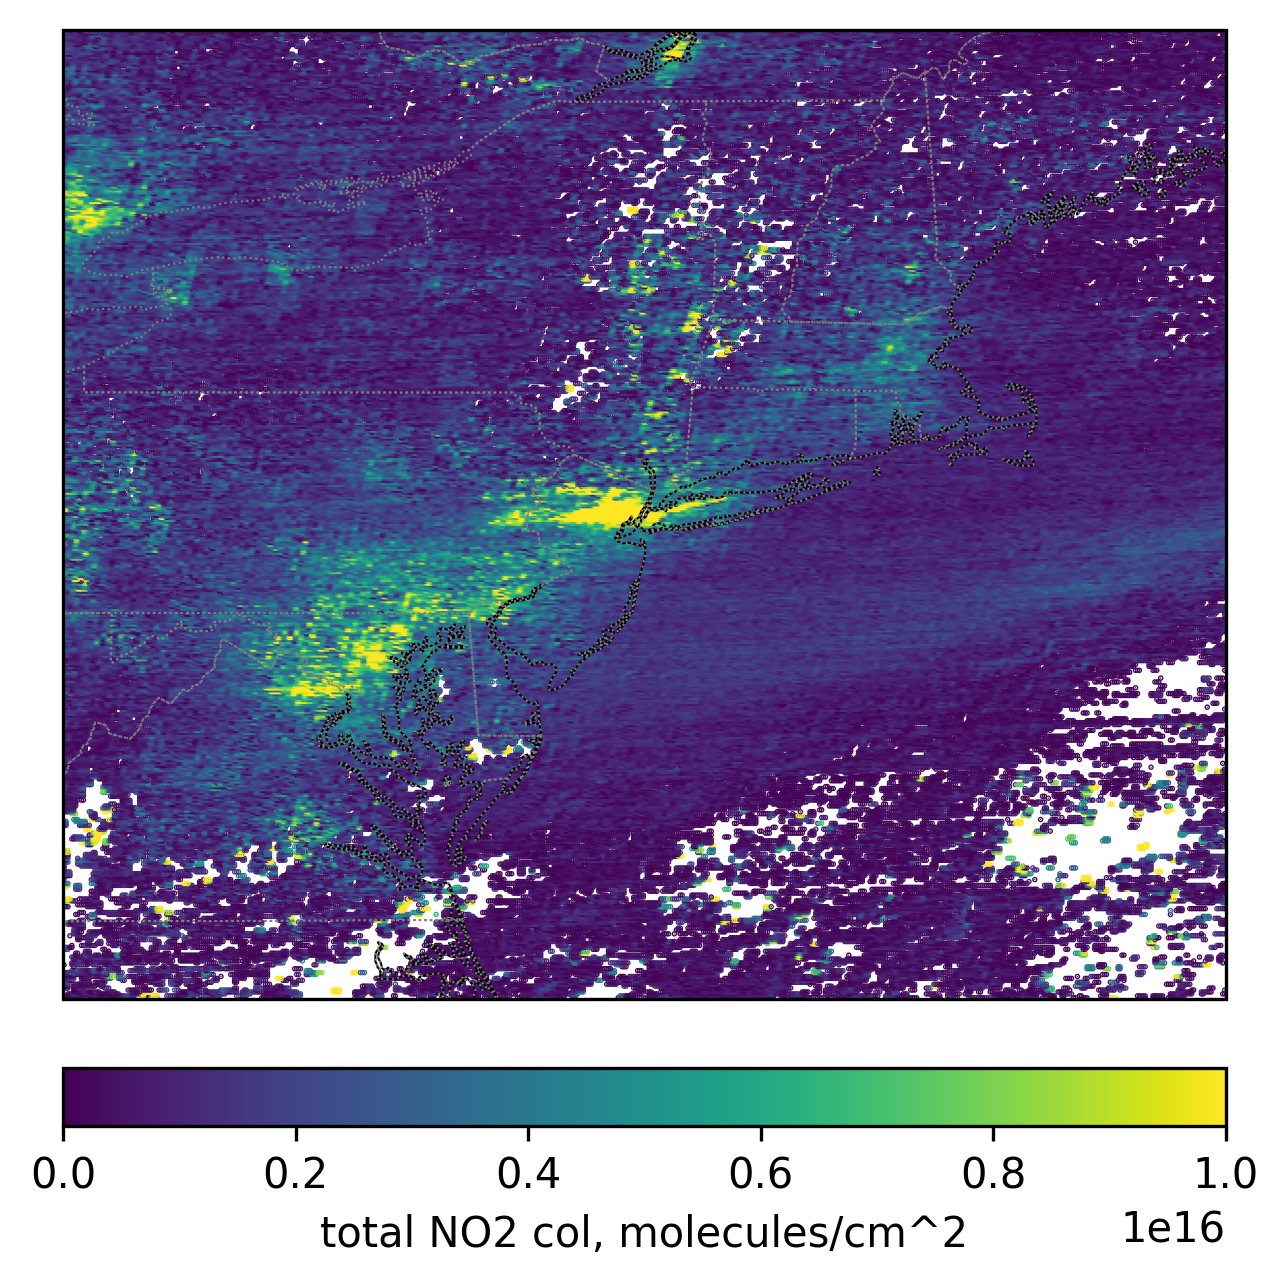

In [62]:
# Create a Cartopy projection
proj = ccrs.PlateCarree()
transform = ccrs.PlateCarree()

# Create a figure and axis.
fig, ax = plt.subplots(
    1, 1, figsize=(5, 6), dpi=300, facecolor=None, subplot_kw={"projection": proj}
)

# Add coastlines and U.S. state borders
ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.STATES, linestyle=":", edgecolor="gray", linewidth=0.5)

im = ax.scatter(
    lon_loc_2D[best_data_mask_loc],
    lat_loc_2D[best_data_mask_loc],
    s=0.1,
    c=trop_NO2_column_loc[best_data_mask_loc], # Use only tropospheric NO2 column for coloring
    vmin=0, # Adjust vmin and vmax for better color mapping of positive values
    vmax=1.0e16, # Assuming a reasonable upper bound for tropospheric NO2
    transform=transform,
)
ax.set_extent([POI_lon - dlon, POI_lon + dlon, POI_lat - dlat, POI_lat + dlat], crs=transform) # Set extent to the defined bounding box


cb = plt.colorbar(
    im,
    # Adjust ticks based on the new vmax
    ticks=[0, 0.2e16, 0.4e16, 0.6e16, 0.8e16, 1.0e16],
    location="bottom",
    fraction=0.05,
    pad=0.05,
)
cb.set_label("total NO2 col, " + NO2_unit, fontsize=10)

plt.show()